In [2]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch

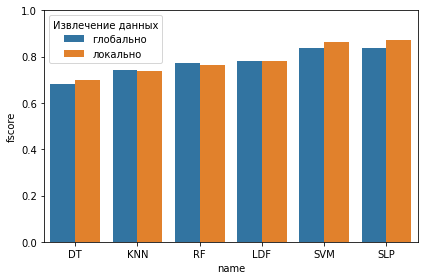

In [3]:
glob = pd.read_excel(f'..\\data\\result\\global_ndvi_long.xlsx')
loc = pd.read_excel(f'..\\data\\result\\local_ndvi_long.xlsx')
conc = pd.concat([glob, loc], axis=0)
g = ['глобально' for i in range(len(glob))]
l = ['локально' for i in range(len(loc))]
conc['Извлечение данных'] = pd.Series(g + l, index=conc.index)
conc = conc.loc[conc['properties'] == 'FEATURES']
clfs = ['DT', 'KNN', 'RF', 'LDF', 'SVM', 'SLP']
sns.barplot(x="name", y="fscore", hue="Извлечение данных", order=clfs, data=conc)
plt.ylim((0, 1))
plt.tight_layout()

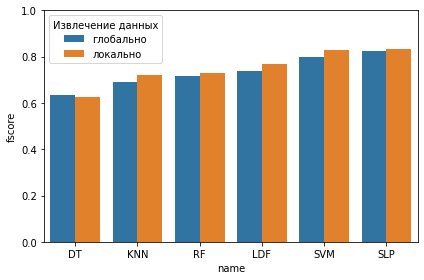

In [4]:
glob = pd.read_excel(f'..\\data\\result\\global_R_long.xlsx')
loc = pd.read_excel(f'..\\data\\result\\local_R_long.xlsx')
conc = pd.concat([glob, loc], axis=0)
g = ['глобально' for i in range(len(glob))]
l = ['локально' for i in range(len(loc))]
conc['Извлечение данных'] = pd.Series(g + l, index=conc.index)
conc = conc.loc[conc['properties'] == 'FEATURES']
clfs = ['DT', 'KNN', 'RF', 'LDF', 'SVM', 'SLP']
sns.barplot(x="name", y="fscore", hue="Извлечение данных", order=clfs, data=conc)
plt.ylim((0, 1))
plt.tight_layout()

In [14]:
def plot(name, root, title):
#     df_mean = pd.read_excel(f'..\\data\\{root}\\{name}_short.xlsx')
#     df = pd.read_excel(f'..\\data\\{root}\\{name}_middle.xlsx')
    df_full = pd.read_excel(f'..\\data\\{root}\\{name}_long.xlsx')
    
#     conc = pd.concat([df_mean, df, df_full], axis=0)
#     mean = ['mean' for i in range(len(df_mean))]
#     opt = ['opt' for i in range(len(df))]
    conc = df_full
    mean, opt = [], []
    full = ['full' for i in range(len(df_full))]
    conc['type'] = pd.Series(mean + opt + full, index=conc.index)

    clfs = ['DT', 'KNN', 'RF', 'LDF', 'SVM', 'SLP']
    col_order = ['STAT', 'STAT+HIST', 'GLCM', 'FEATURES']
    row_order = ['mean', 'opt', 'full']


    fig = plt.figure(dpi=300)
    sns.set_context('paper')
    fig = plt.figure()
    for i, clf in enumerate(clfs):
        ax = fig.add_subplot(1, len(clfs)+1, i+1)
#         clf_df = conc.loc[df_mean['name'] == clf]
        clf_df =conc 
        name = 'Long'
        clf_df = clf_df.pivot('type', 'properties', values='fscore') 
        clf_df = clf_df.reindex(col_order, axis=1)
        clf_df = clf_df.reindex(row_order, axis=0)
        sns.heatmap(clf_df, annot=True, vmin=0.4, vmax=0.85, cbar=False, ax=ax, fmt=".2f", 
                    annot_kws={"size": 14}, cmap='coolwarm')

        ax.set_xticks(np.arange(0.5, 4.5, 1))
        ax.set_xticklabels(['STAT', 'STAT+HIST', 'GLCM', 'ALL'], rotation=0)
        ax.set_yticks(np.arange(0.5, 3.5, 1))
        ax.set_yticklabels(['short', 'middle', 'long'], rotation=0)
        ax.set_title(clf)
        ax.set_xlabel('')
        ax.set_ylabel('')
        if i+1 != 1: 
            ax.set_yticks([])

    fig.set_size_inches((25, 2))
    fig.suptitle(title, fontsize=20, x=0.445, y=1.1)

# Classification

## RED

<Figure size 1800x1200 with 0 Axes>

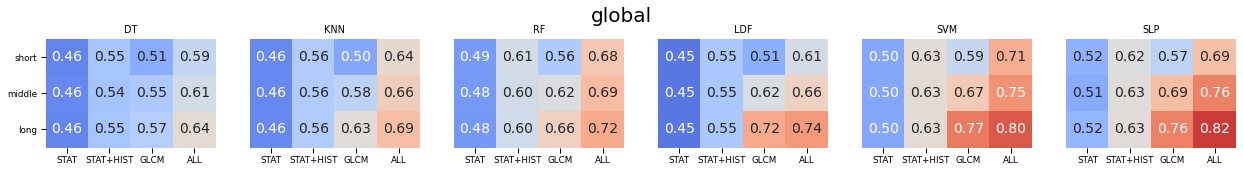

<Figure size 1800x1200 with 0 Axes>

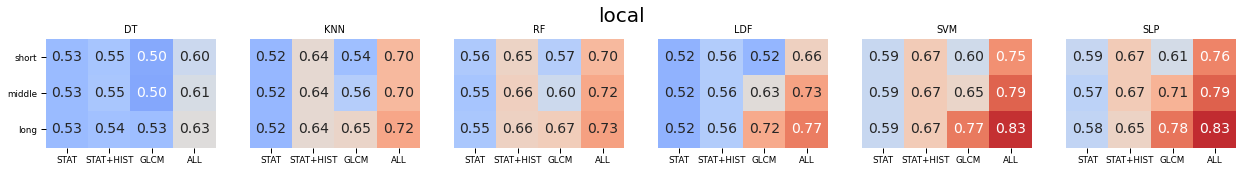

<Figure size 1800x1200 with 0 Axes>

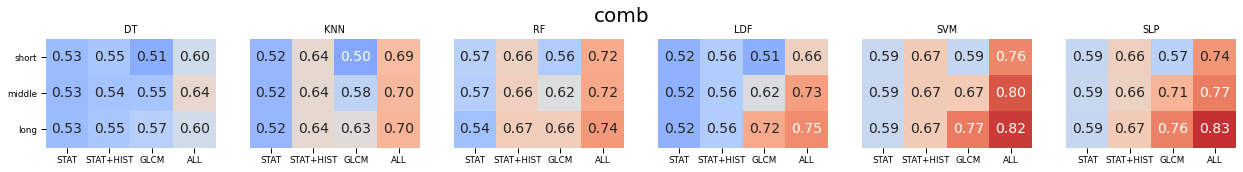

In [82]:
name = 'global_R'
plot(name, 'result', 'global')
name = 'local_R'
plot(name, 'result', 'local')
name = 'comb_R'
plot(name, 'result', 'comb')

## NDVI

ValueError: Index contains duplicate entries, cannot reshape

<Figure size 1800x1200 with 0 Axes>

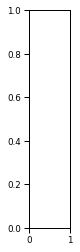

In [15]:
name = 'global_ndvi'
plot(name, 'result', 'global')
name = 'local_ndvi'
plot(name, 'result', 'local')
# name = 'comb_ndvi'
# plot(name, 'result', 'comb')

# Detection

## RED

<Figure size 1800x1200 with 0 Axes>

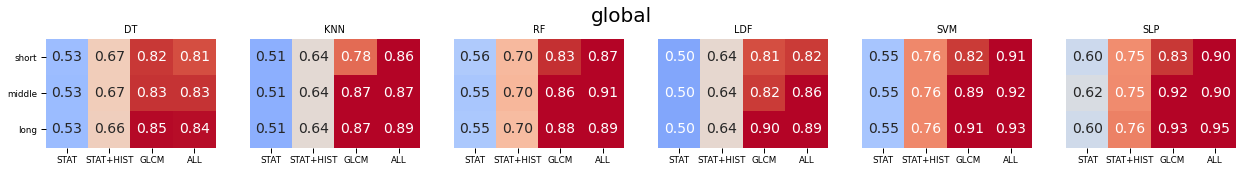

<Figure size 1800x1200 with 0 Axes>

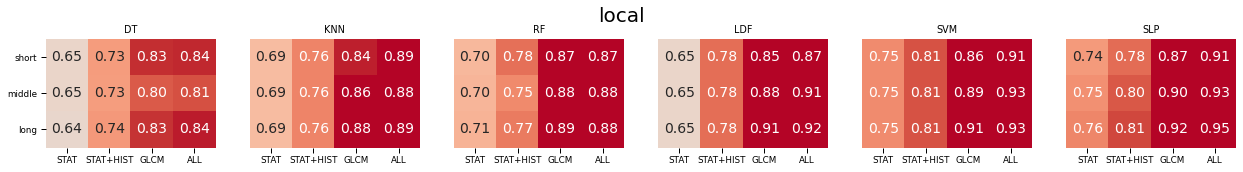

<Figure size 1800x1200 with 0 Axes>

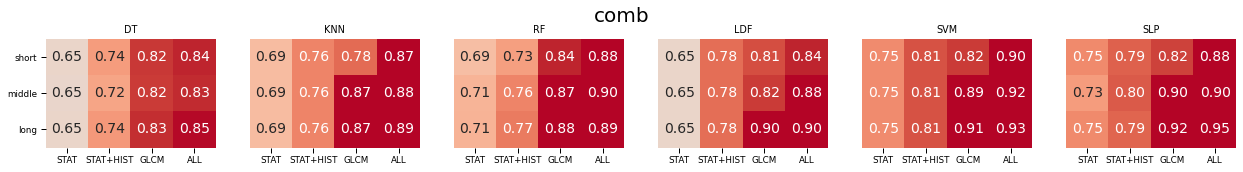

In [79]:
name = 'global_R'
plot(name, 'result_detect', 'global')
name = 'local_R'
plot(name, 'result_detect', 'local')
name = 'comb_R'
plot(name, 'result_detect', 'comb')

## NDVI

<Figure size 1800x1200 with 0 Axes>

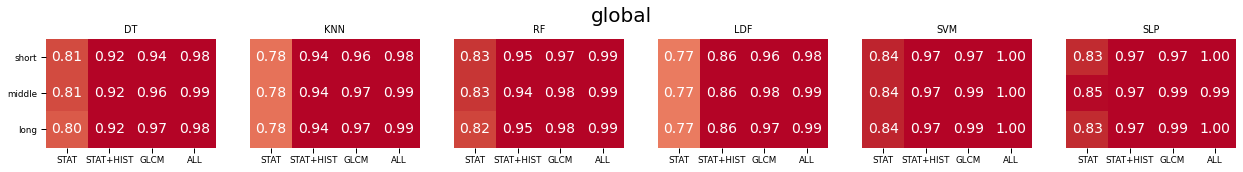

<Figure size 1800x1200 with 0 Axes>

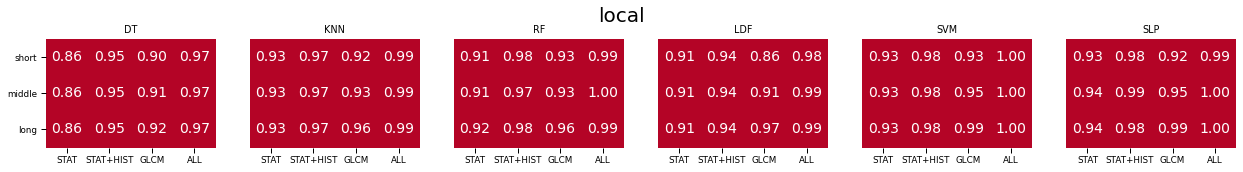

<Figure size 1800x1200 with 0 Axes>

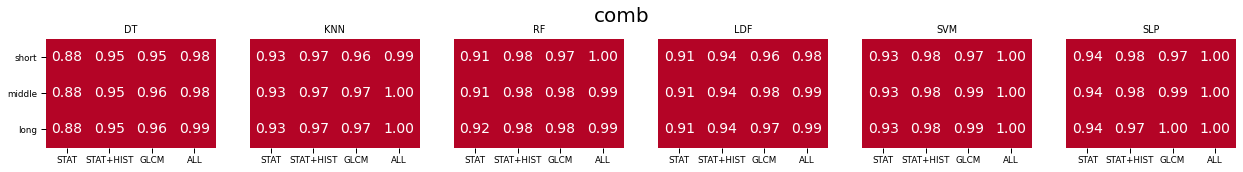

In [74]:
name = 'global_ndvi'
plot(name, 'result_detect', 'global')
name = 'local_ndvi'
plot(name, 'result_detect', 'local')
name = 'comb_ndvi'
plot(name, 'result_detect', 'comb')

# Confusion matrix

In [ ]:
SVM,  на local full и  SVM,  на local full

Text(248.66666666666666, 0.5, 'Действительные метки')

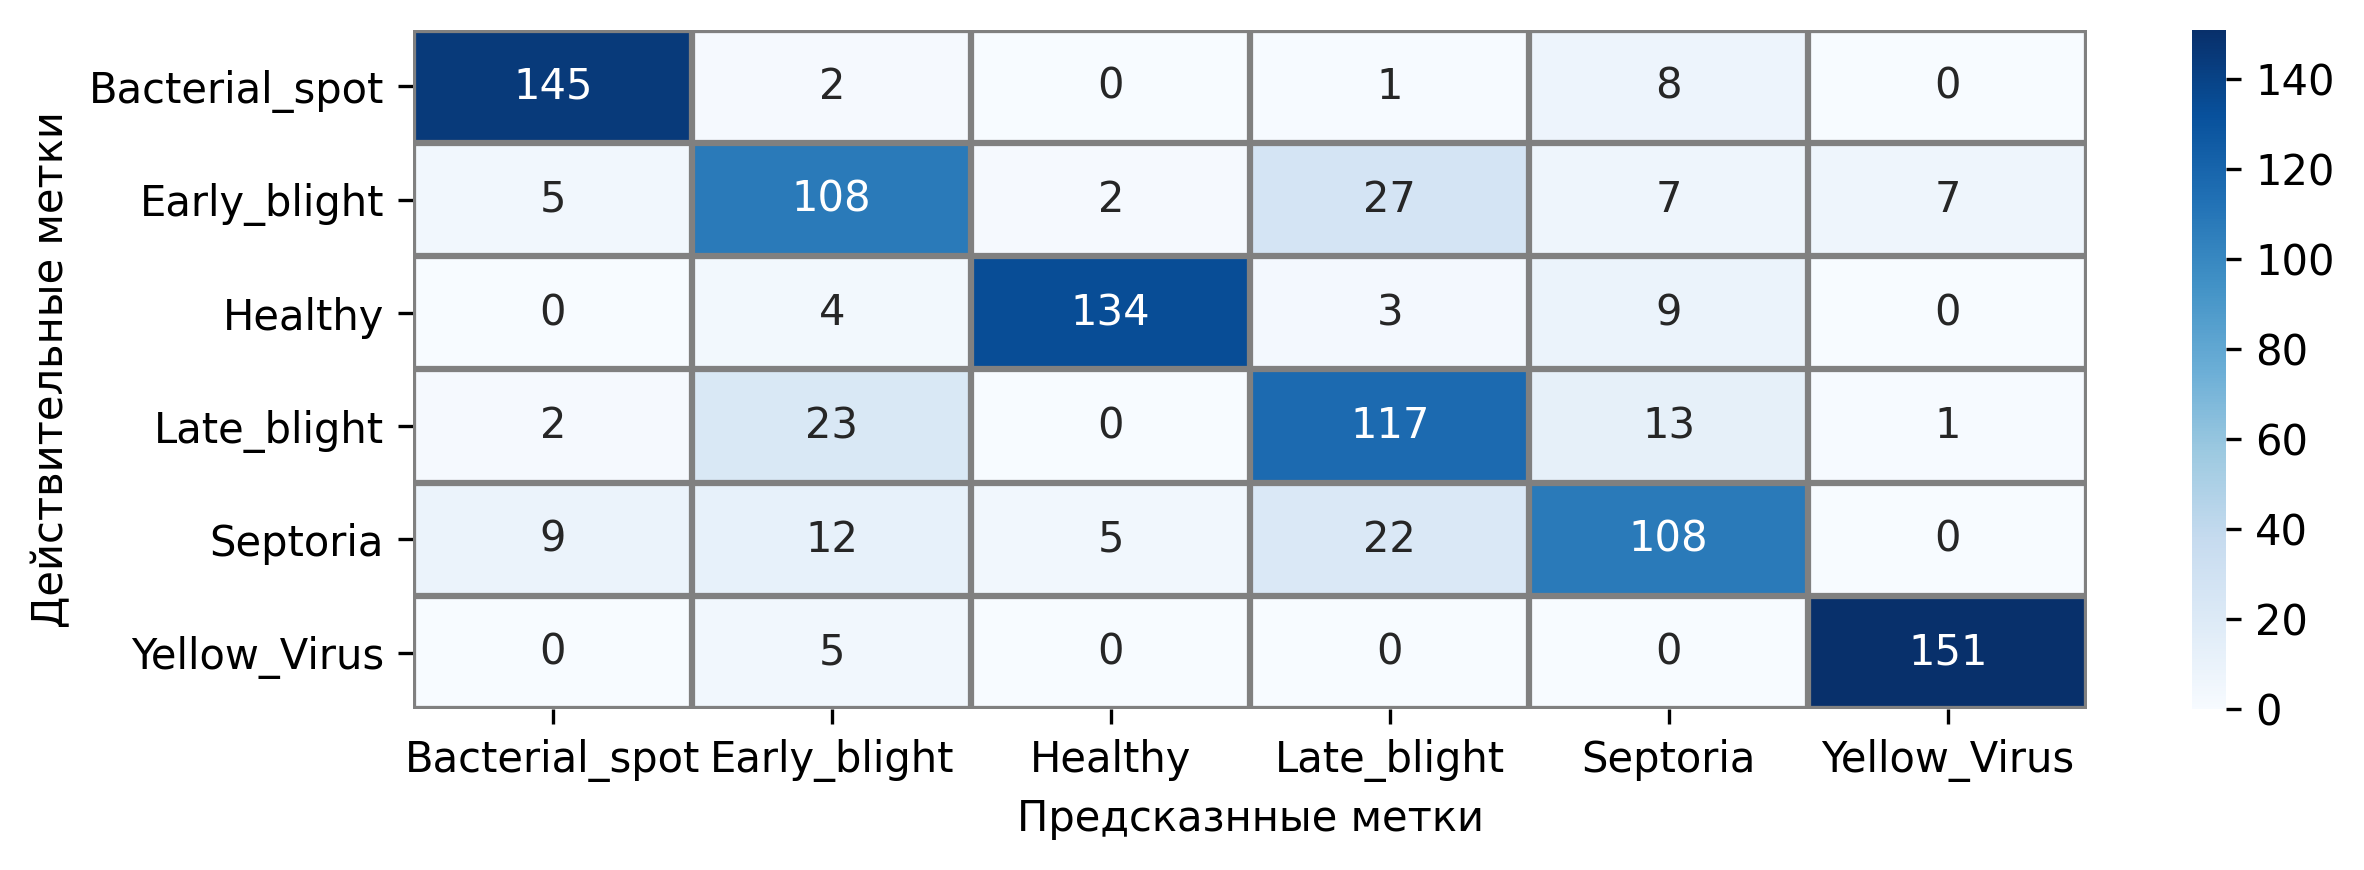

In [28]:
data = torch.load("..\\data\\test_predict\\SLPClassifer_comb_R.pth")
data['prediction'].shape, data['y'].shape
cm = confusion_matrix(data['y'], data['prediction'])
name = ["Bacterial_spot", "Early_blight", "Healthy", "Late_blight", "Septoria", "Yellow_Virus"]
df_cm = pd.DataFrame(cm, index = name, columns = name)
plt.figure(figsize = (9,3), dpi=300)
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
[plt.hlines(np.arange(len(name)+1), *plt.xlim(), color='grey')]
[plt.vlines(np.arange(len(name)+1), *plt.ylim(), color='grey')]
plt.xlabel('Предсказнные метки')
plt.ylabel('Действительные метки')

Text(248.66666666666666, 0.5, 'Действительные метки')

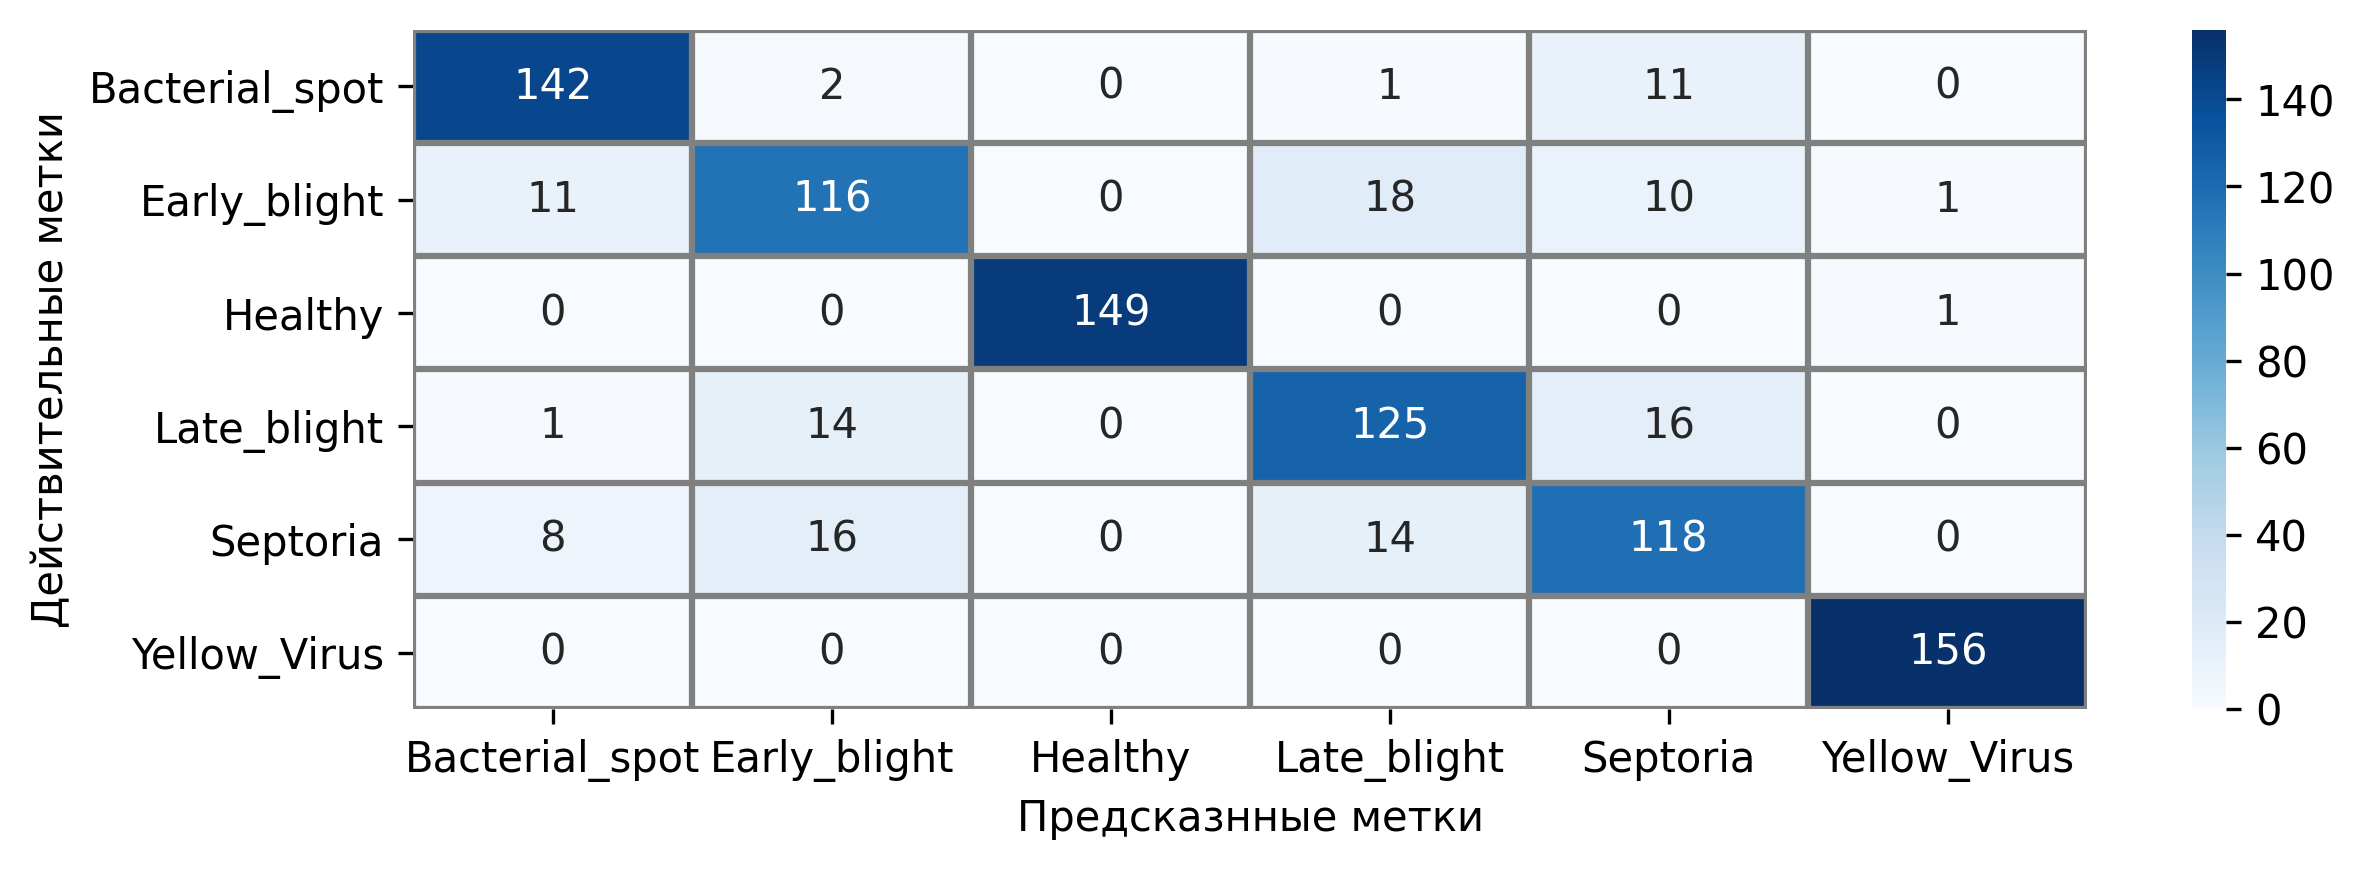

In [29]:
data = torch.load("..\\data\\test_predict\\SLPClassifer_comb_NDVI.pth")
data['prediction'].shape, data['y'].shape
cm = confusion_matrix(data['y'], data['prediction'])
name = ["Bacterial_spot", "Early_blight", "Healthy", "Late_blight", "Septoria", "Yellow_Virus"]
df_cm = pd.DataFrame(cm, index = name, columns = name)
plt.figure(figsize = (9,3), dpi=300)
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
[plt.hlines(np.arange(len(name)+1), *plt.xlim(), color='grey')]
[plt.vlines(np.arange(len(name)+1), *plt.ylim(), color='grey')]
plt.xlabel('Предсказнные метки')
plt.ylabel('Действительные метки')